In [2]:
import numpy as np
import itertools as it
%matplotlib inline

In [151]:
definition = 6
def gen_random_vectors(definition=definition):
    random_vectors = np.random.choice(range(1, 11), size = (definition,definition,2))
    norms = np.reshape(np.linalg.norm(random_vectors, axis=2), (definition,definition,1))

    #normalized landscape
    gradient_landscape = np.array(np.divide(random_vectors, norms))
    return gradient_landscape

gradient_landscape = gen_random_vectors()

def dotGridGradient(ix, x, gradient_landscape = gradient_landscape):
    # Compute the distance vector
    dx = x - ix
    grad_vector = gradient_landscape[ix[0], ix[1]]
    return np.dot(dx, grad_vector)


def perlin(x):
    #xs is 5 dimensional real vector
    #determine grid cell around point:
    x = np.array(x)
    x0 = x.astype(int)
    sx_base = x - x0
    #next we consider the other corners of the cube:
    dimensions = len(x)
    zero_add = list(it.product(range(2), repeat = dimensions))
    num_of_corners = len(zero_add)
    x1_corners = np.zeros((num_of_corners, dimensions))
    sx_distances = np.zeros(num_of_corners).tolist()
    for k in range(num_of_corners):
        x1_corners[k]= (x0 + list(zero_add[k]))
        sx_distances[k] = np.absolute(np.subtract(zero_add[k], sx_base))
    x1_corners = np.array(x1_corners).astype(int)

    corner_dot_gradients = zero_add
    for d in range(num_of_corners):
        corner_dot_gradients[d] = dotGridGradient(x1_corners[d], x)
        
    def interpolation():
        result = 0
        for d in range(num_of_corners):
            weights = np.ones(len(sx_distances[d])) - sx_distances[d]
            interpolation_factor = np.product(weights)
            contribution = interpolation_factor*corner_dot_gradients[d]
            #print('corner, inter factor, corner dot grad, contribution')
            #print(x1_corners[d], interpolation_factor, corner_dot_gradients[d],contribution)
            result += contribution
        return result
    
    return interpolation()


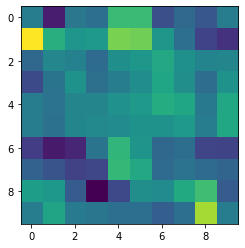

In [152]:
pricision = 10
range_rel = np.linspace(0, definition-1.0001, pricision).tolist()
landscape = [[perlin([x,y]) for y in range_rel] for x in range_rel]

plt.imshow(landscape, interpolation='nearest')
plt.show()

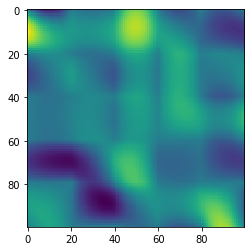

In [153]:
pricision = 100
range_rel = np.linspace(0, definition-1.0001, pricision).tolist()
landscape = [[perlin([x,y]) for y in range_rel] for x in range_rel]

plt.imshow(landscape, interpolation='nearest')
plt.show()

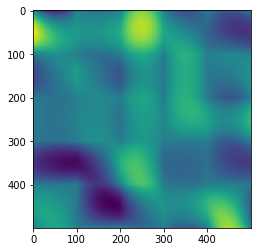

In [154]:
pricision = 500
range_rel = np.linspace(0, definition-1.0001, pricision).tolist()
landscape = [[perlin([x,y]) for y in range_rel] for x in range_rel]

plt.imshow(landscape, interpolation='nearest')
plt.show()
